### Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

In [2]:
df = pd.read_csv('Cust_Spend_Data.csv')
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [3]:
df_attribute = df.iloc[:,2:]

In [5]:
df_scaled = df_attribute.apply(zscore)

In [6]:
df_scaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


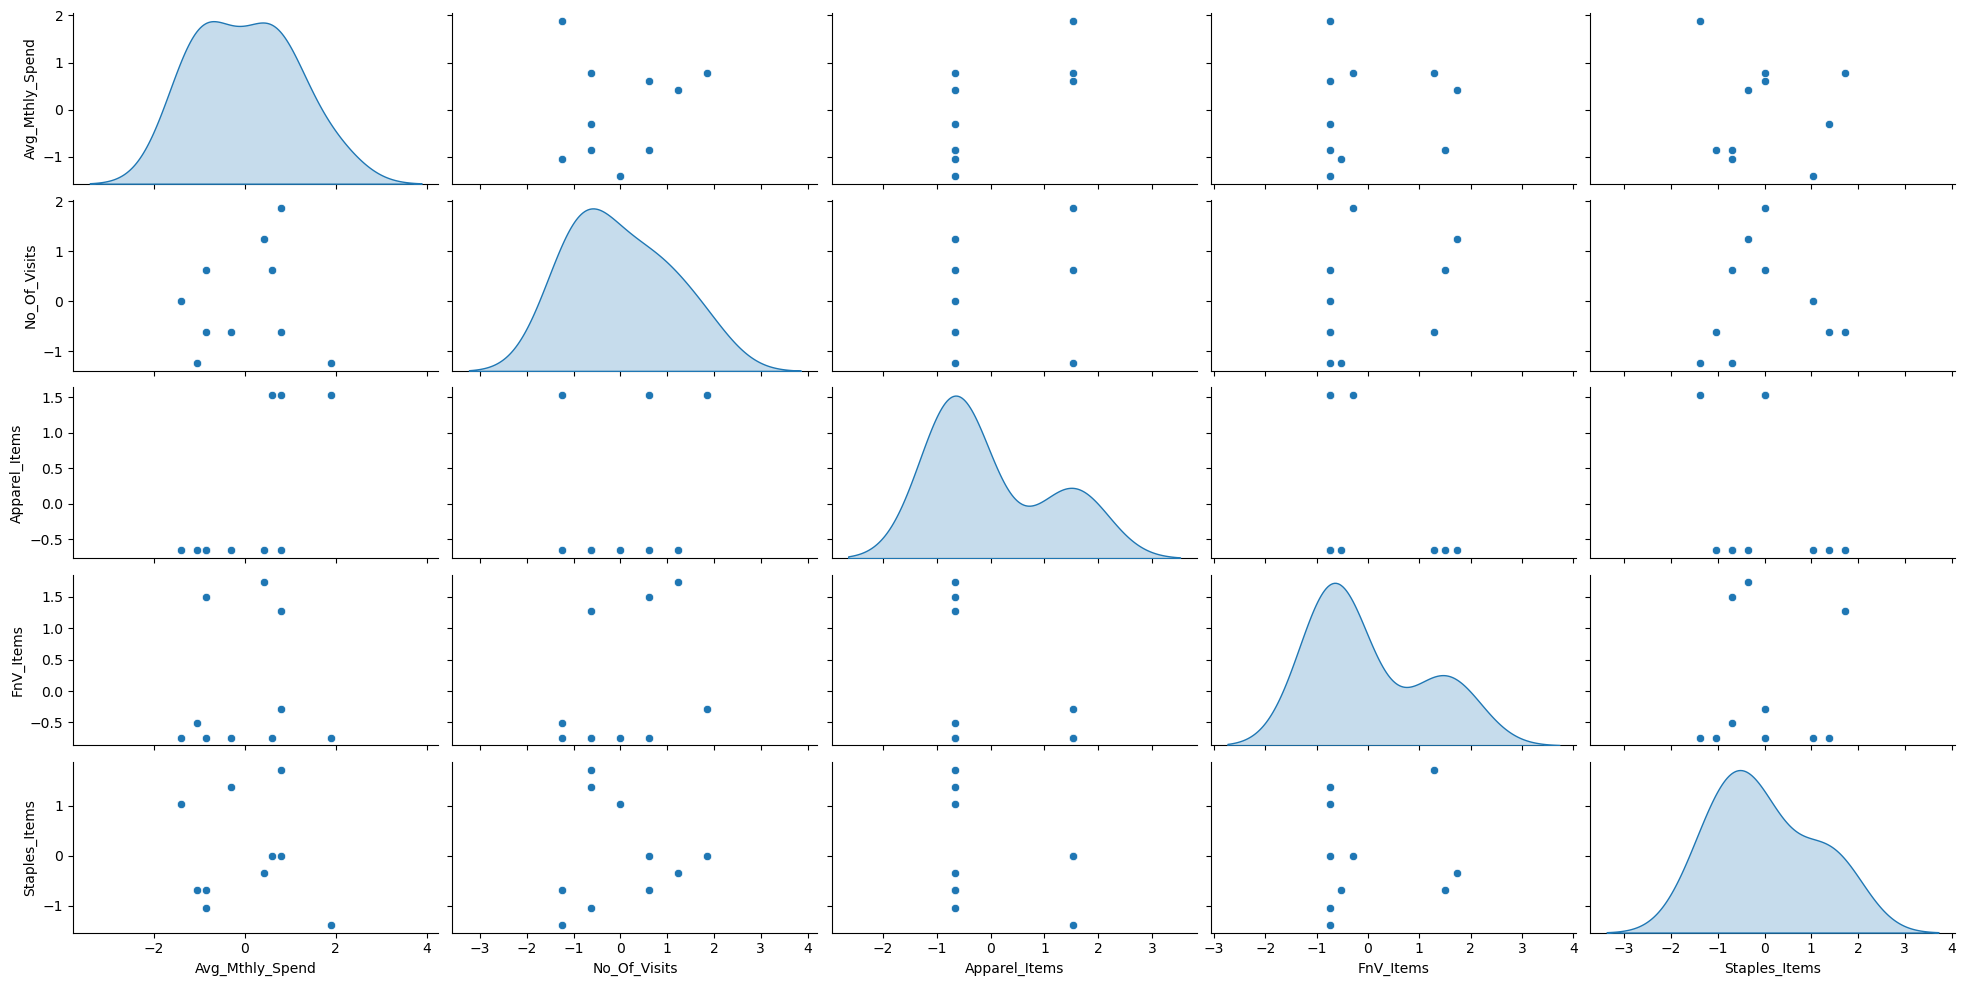

In [7]:
sns.pairplot(df_scaled, height=2, aspect=2, diag_kind='kde')

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(df_scaled)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [10]:
df_attribute['labels'] = model.labels_

In [11]:
df_attribute.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1


In [13]:
df_attributeClus = df_attribute.groupby(['labels'])
df_attributeClus.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [15]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [16]:
z = linkage(df_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(z, pdist(df_scaled))
c

0.8681149436293064

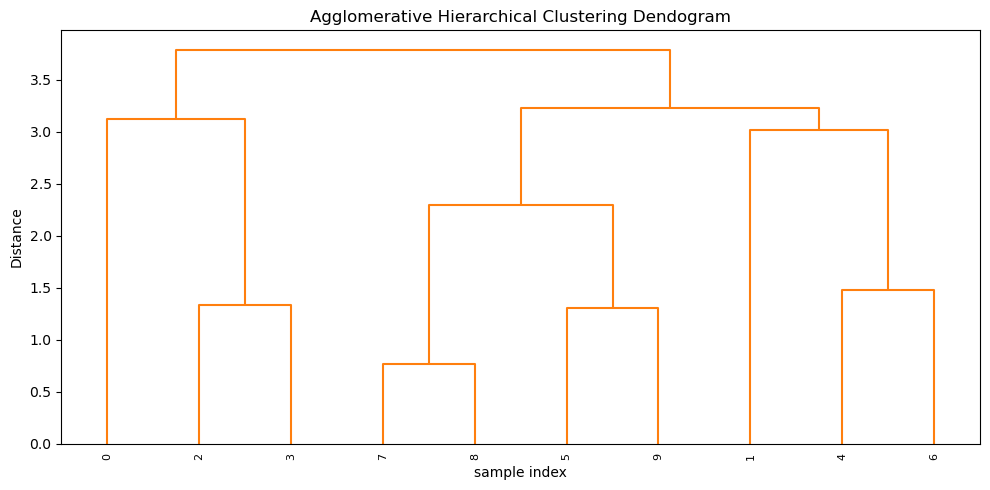

In [17]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(z, leaf_rotation=90, color_threshold=40, leaf_font_size=8)
plt.tight_layout()

In [18]:
z = linkage(df_scaled, metric='euclidean', method ='complete')
c, coph_dists = cophenet(z, pdist(df_scaled))
c

0.8606955190809153

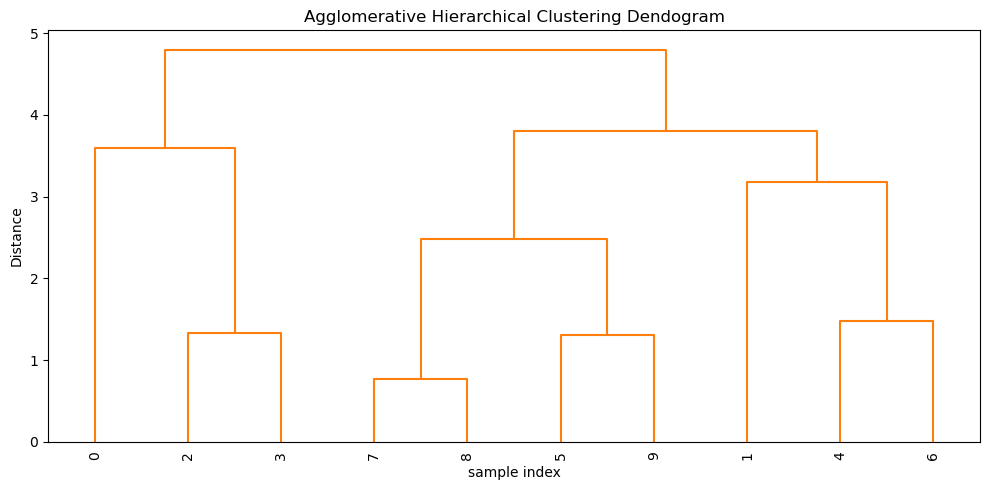

In [19]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(z, leaf_rotation=90, color_threshold=90, leaf_font_size=10)
plt.tight_layout()

In [21]:
z= linkage(df_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(z,pdist(df_scaled))
c

0.8453818941339526

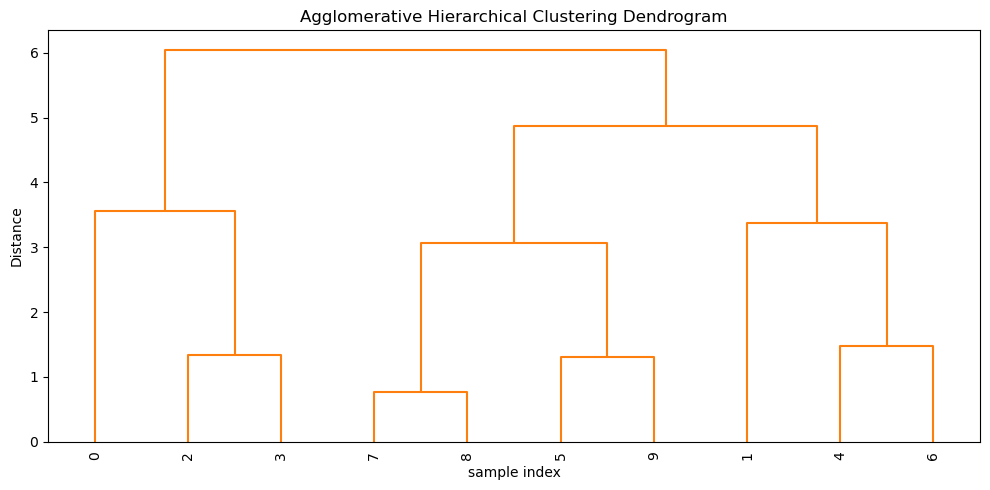

In [22]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(z, leaf_rotation=90, color_threshold=600, leaf_font_size=10)
plt.tight_layout()